In [ ]:
!nvidia-smi

Sun May 26 12:42:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   61C    P0              30W /  72W |    255MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Block 1 - Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import struct

# Define the paths
drive_base_path = '/content/drive/MyDrive/FinalProject/datasets'
emnist_base_path = os.path.join(drive_base_path, 'emnist/raw')

# Function to load EMNIST dataset from IDX files
def load_emnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols, 1)
    return images

def load_emnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load EMNIST datasets
emnist_train_images_path = os.path.join(emnist_base_path, 'emnist-digits-train-images-idx3-ubyte')
emnist_train_labels_path = os.path.join(emnist_base_path, 'emnist-digits-train-labels-idx1-ubyte')
emnist_test_images_path = os.path.join(emnist_base_path, 'emnist-digits-test-images-idx3-ubyte')
emnist_test_labels_path = os.path.join(emnist_base_path, 'emnist-digits-test-labels-idx1-ubyte')

emnist_train_images = load_emnist_images(emnist_train_images_path)
emnist_train_labels = load_emnist_labels(emnist_train_labels_path)
emnist_test_images = load_emnist_images(emnist_test_images_path)
emnist_test_labels = load_emnist_labels(emnist_test_labels_path)


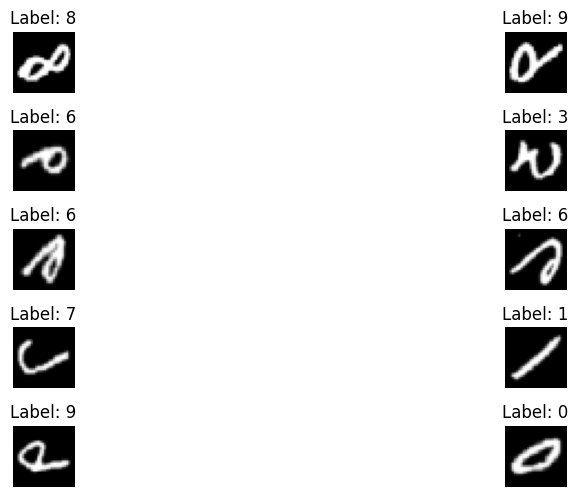

In [ ]:
# Display some corrected images to verify orientation
import matplotlib.pyplot as plt
def plot_raw_samples(images, labels, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Plot a few corrected images to check alignment
plot_raw_samples(emnist_train_images, emnist_train_labels)

In [ ]:
import tensorflow as tf

def correct_orientation(images):
    corrected_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        # Flip horizontally and rotate 90 degrees counterclockwise
        corrected_images[i] = tf.image.rot90(tf.image.flip_left_right(images[i]), k=1).numpy()
    return corrected_images

# Correct the orientation of the images
emnist_train_images_corrected = correct_orientation(emnist_train_images)
emnist_test_images_corrected = correct_orientation(emnist_test_images)




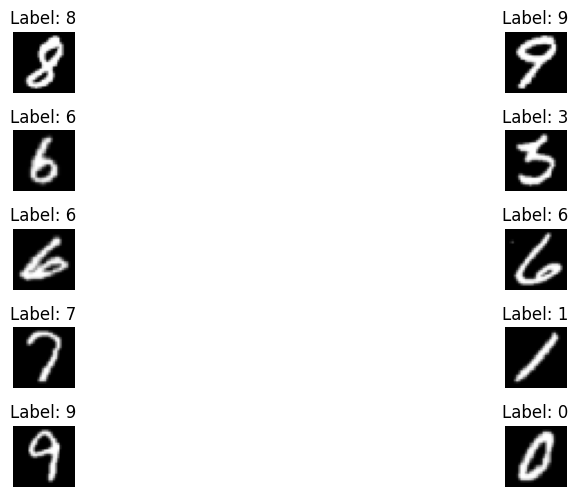

In [ ]:
# Display some corrected images to verify orientation
import matplotlib.pyplot as plt
def plot_corrected_samples(images, labels, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a few corrected images to check alignment
plot_corrected_samples(emnist_train_images_corrected, emnist_train_labels)

In [ ]:
import os

# Define paths to save the corrected datasets
corrected_base_path = '/content/drive/MyDrive/FinalProject/corrected_datasets'
os.makedirs(corrected_base_path, exist_ok=True)
corrected_train_images_path = os.path.join(corrected_base_path, 'emnist_corrected_train_images.npy')
corrected_train_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_train_labels.npy')
corrected_test_images_path = os.path.join(corrected_base_path, 'emnist_corrected_test_images.npy')
corrected_test_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_test_labels.npy')

# Save the corrected images and labels
np.save(corrected_train_images_path, emnist_train_images_corrected)
np.save(corrected_train_labels_path, emnist_train_labels)
np.save(corrected_test_images_path, emnist_test_images_corrected)
np.save(corrected_test_labels_path, emnist_test_labels)

print("Corrected datasets have been saved to Google Drive.")




NameError: name 'emnist_train_images_corrected' is not defined

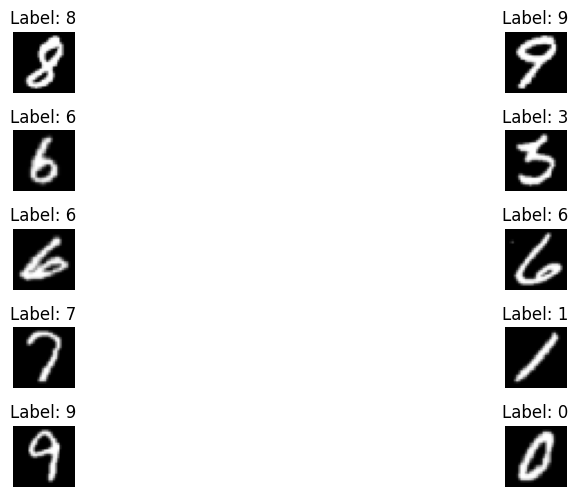

Verification completed.


In [8]:
# Load a few samples from the saved files
import os
import numpy as np
import matplotlib.pyplot as plt

# Define paths to save the corrected datasets
corrected_base_path = '/content/drive/MyDrive/FinalProject/corrected_datasets'
os.makedirs(corrected_base_path, exist_ok=True)
corrected_train_images_path = os.path.join(corrected_base_path, 'emnist_corrected_train_images.npy')
corrected_train_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_train_labels.npy')
corrected_test_images_path = os.path.join(corrected_base_path, 'emnist_corrected_test_images.npy')
corrected_test_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_test_labels.npy')
loaded_train_images = np.load(corrected_train_images_path)
loaded_train_labels = np.load(corrected_train_labels_path)

# Function to plot original images
def plot_samples(images, labels, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a few loaded images to check alignment
plot_samples(loaded_train_images, loaded_train_labels)

print("Verification completed.")


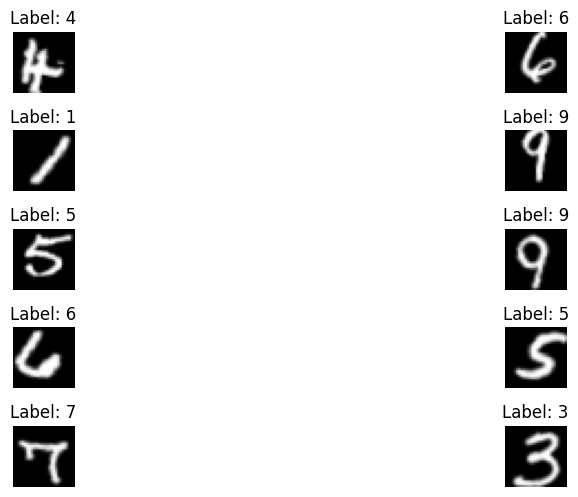

Data augmentation and training preparation completed.


In [9]:
# Block 4 - Data Augmentation and Model Training Preparation
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the corrected datasets from Google Drive
corrected_base_path = '/content/drive/MyDrive/FinalProject/corrected_datasets'
corrected_train_images_path = os.path.join(corrected_base_path, 'emnist_corrected_train_images.npy')
corrected_train_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_train_labels.npy')
corrected_test_images_path = os.path.join(corrected_base_path, 'emnist_corrected_test_images.npy')
corrected_test_labels_path = os.path.join(corrected_base_path, 'emnist_corrected_test_labels.npy')

train_images = np.load(corrected_train_images_path)
train_labels = np.load(corrected_train_labels_path)
val_images = np.load(corrected_test_images_path)
val_labels = np.load(corrected_test_labels_path)

# Split the validation set into validation and test sets
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size=0.5, random_state=42)

# Data augmentation and normalization with balanced distortion
train_datagen = ImageDataGenerator(
    rotation_range=10,  # Slightly increased rotation
    width_shift_range=0.1,  # Slightly increased shift
    height_shift_range=0.1,  # Slightly increased shift
    shear_range=0.1,  # Slightly increased shear
    zoom_range=0.1,  # Slightly increased zoom
    horizontal_flip=False,  # Horizontal flip is unlikely to be useful for digits
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)
test_generator = val_datagen.flow(test_images, test_labels, batch_size=32)

# Function to plot augmented images
def plot_augmented_samples(generator, num_samples=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        x_batch, y_batch = next(generator)
        plt.subplot(num_samples, 2, i + 1)
        plt.imshow(x_batch[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y_batch[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot a few augmented images to check augmentation
plot_augmented_samples(train_generator)

print("Data augmentation and training preparation completed.")



In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from tensorflow.keras.models import load_model
# Function to plot training results
def plot_training_results(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Function to combine multiple histories into one
def combine_histories(history_files):
    combined_history = {
        'accuracy': [],
        'val_accuracy': [],
        'loss': [],
        'val_loss': []
    }

    for history_path in history_files:
        with open(history_path, 'rb') as f:
            history = pickle.load(f)
            for key in combined_history.keys():
                combined_history[key].extend(history[key])

    return combined_history

# Function to evaluate model and plot results
def evaluate_and_plot(model, val_images, val_labels, test_images, test_labels, history, history_path):
    val_predictions = model.predict(val_images)
    test_predictions = model.predict(test_images)

    val_pred_labels = np.argmax(val_predictions, axis=1)
    test_pred_labels = np.argmax(test_predictions, axis=1)

    val_report = classification_report(val_labels, val_pred_labels, output_dict=True)
    test_report = classification_report(test_labels, test_pred_labels, output_dict=True)

    with open(f'{history_path}_val_report.pkl', 'wb') as f:
        pickle.dump(val_report, f)

    with open(f'{history_path}_test_report.pkl', 'wb') as f:
        pickle.dump(test_report, f)

    val_cm = confusion_matrix(val_labels, val_pred_labels)
    test_cm = confusion_matrix(test_labels, test_pred_labels)

    with open(f'{history_path}_val_cm.npy', 'wb') as f:
        np.save(f, val_cm)

    with open(f'{history_path}_test_cm.npy', 'wb') as f:
        np.save(f, test_cm)

    print("Validation Classification Report:\n", classification_report(val_labels, val_pred_labels))
    print("Test Classification Report:\n", classification_report(test_labels, test_pred_labels))

    plot_training_results(history)

    plot_roc_auc(val_labels, val_predictions, num_classes=10, dataset_name='Validation Set')
    plot_precision_recall(val_labels, val_predictions, num_classes=10, dataset_name='Validation Set')

    plot_roc_auc(test_labels, test_predictions, num_classes=10, dataset_name='Test Set')
    plot_precision_recall(test_labels, test_predictions, num_classes=10, dataset_name='Test Set')

# Function to plot ROC-AUC curve
def plot_roc_auc(y_true, y_pred, num_classes, dataset_name):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve - {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall(y_true, y_pred, num_classes, dataset_name):
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true == i, y_pred[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {dataset_name}')
    plt.legend(loc='lower left')
    plt.show()


In [11]:
#  Block - Model Training Function
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, ModelCheckpoint
import pickle

#    Train a given model with specified parameters and save the training history and model.
def train_model(model, train_generator, val_generator, model_path, log_path, history_path, epochs=50):


    # Define early stopping, reduce learning rate on plateau, CSV logger, and model checkpoint callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
    csv_logger = CSVLogger(log_path, append=True)
    checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[early_stopping, reduce_lr, csv_logger, checkpoint]
    )

    # Save the final trained model and history
    model.save(model_path)

    with open(history_path, 'wb') as f:
        pickle.dump(history.history, f)

    print(f"Model training completed and saved to {model_path}")
    return history

In [13]:
# Block 5 - Model Definition and Compilation
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a custom residual block with Squeeze-and-Excitation (SE)
class SEBlock(layers.Layer):
    def __init__(self, filters, reduction=16):
        super(SEBlock, self).__init__()
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(filters // reduction, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        self.reshape = layers.Reshape((1, 1, filters))

    def call(self, inputs):
        x = self.global_avg_pool(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.reshape(x)
        return inputs * x

def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = (1, 1)

    if downsample:
        strides = (2, 2)
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = SEBlock(filters)(x)  # Add SE block

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def create_improved_cnn(input_shape=(28, 28, 1), num_classes=10):  # Ensure num_classes is 10
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = residual_block(x, 64)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 512, downsample=True)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create the model
input_shape = (28, 28, 1)
num_classes = 10  # Ensure 10 classes for digits 0-9
model = create_improved_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

print("Model definition and compilation completed.")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 14, 14, 64)           0         ['batch_normalization[0][0

In [14]:
# Example usage for initial model
initial_model_path = '/content/drive/MyDrive/initial_model.h5'
initial_log_path = '/content/drive/MyDrive/initial_training_log.csv'
initial_history_path = '/content/drive/MyDrive/initial_training_history.pkl'
initial_history = train_model(model, train_generator, val_generator, initial_model_path, initial_log_path, initial_history_path)

Epoch 1/50
7500/7500 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7500/7500 [==============================] - 128s 15ms/step - loss: 0.1089 - accuracy: 0.9703 - val_loss: 0.0358 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 2/50
7500/7500 [==============================] - 106s 14ms/step - loss: 0.0478 - accuracy: 0.9882 - val_loss: 0.0412 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 3/50
7500/7500 [==============================] - 107s 14ms/step - loss: 0.0362 - accuracy: 0.9912 - val_loss: 0.0160 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 4/50
7500/7500 [==============================] - 105s 14ms/step - loss: 0.0301 - accuracy: 0.9925 - val_loss: 0.0212 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 5/50
7500/7500 [==============================] - 105s 14ms/step - loss: 0.0270 - accuracy: 0.9934 - val_loss: 0.0182 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 6/50
7500/7500 [==============================] - 105s 14ms/step - loss: 0.0243 - accuracy: 0.9941 - val_loss: 0.0236 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 7/50
7500/7500 [=============================

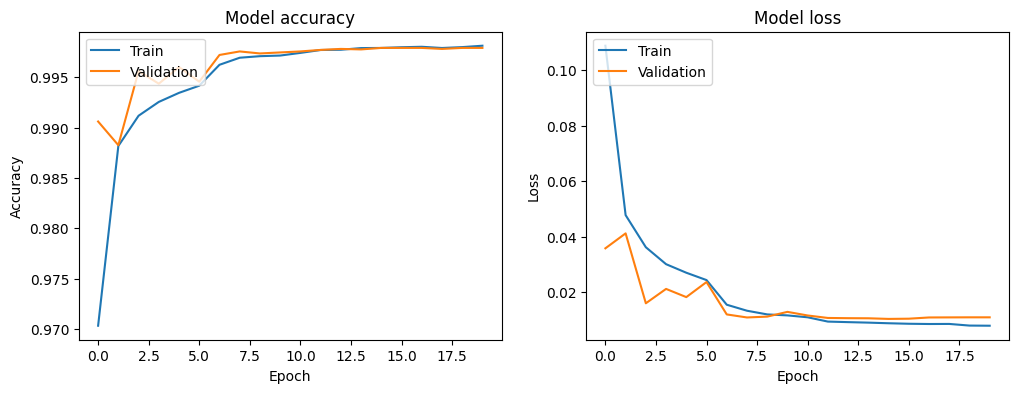

In [15]:
# Paths to history files
history_files = [
    '/content/drive/MyDrive/initial_training_history.pkl'

]

# Combine histories
combined_history = combine_histories(history_files)

# Plot the combined training results
plot_training_results(combined_history)

625/625 [==============================] - 2s 3ms/step
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1994
           1       1.00      1.00      1.00      2014
           2       1.00      1.00      1.00      1962
           3       1.00      1.00      1.00      2016
           4       1.00      1.00      1.00      2001
           5       1.00      1.00      1.00      2023
           6       1.00      1.00      1.00      2019
           7       1.00      1.00      1.00      1991
           8       1.00      1.00      1.00      2046
           9       1.00      1.00      1.00      1934

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2006
           1 

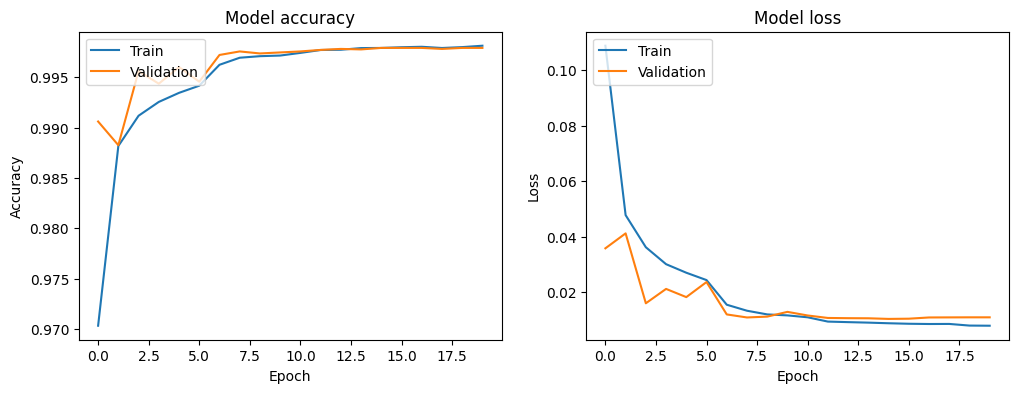

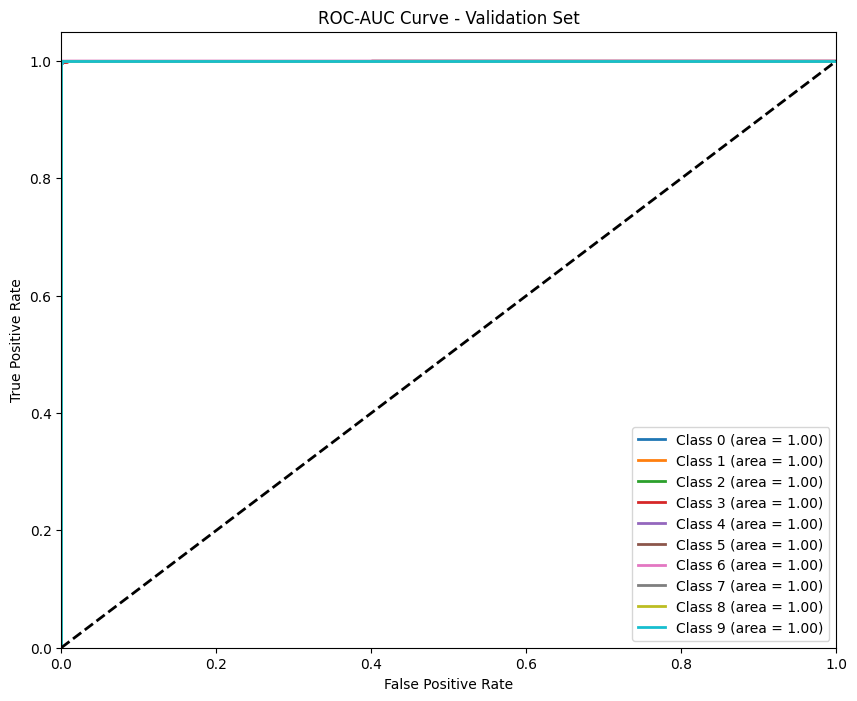

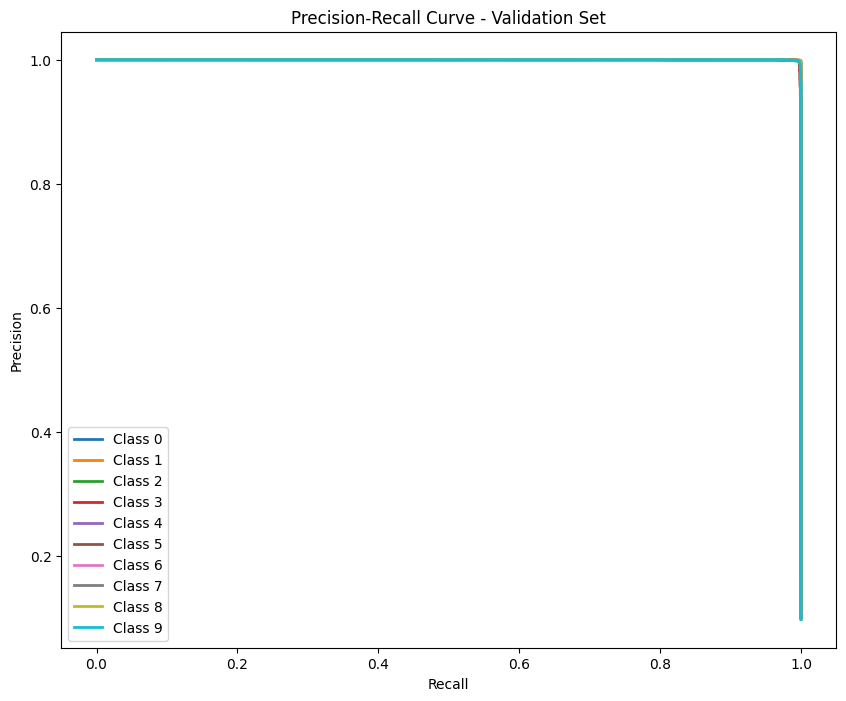

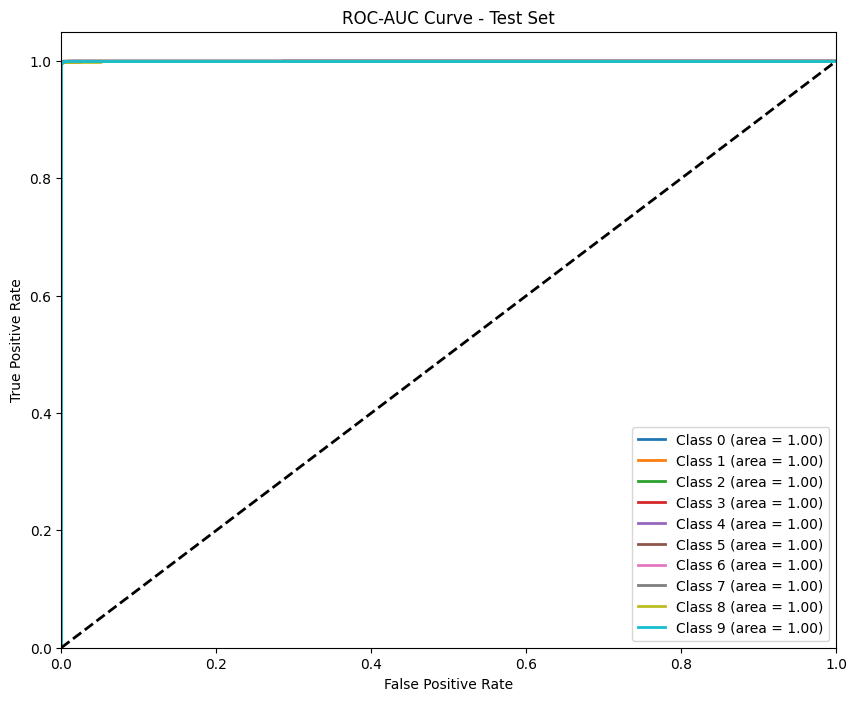

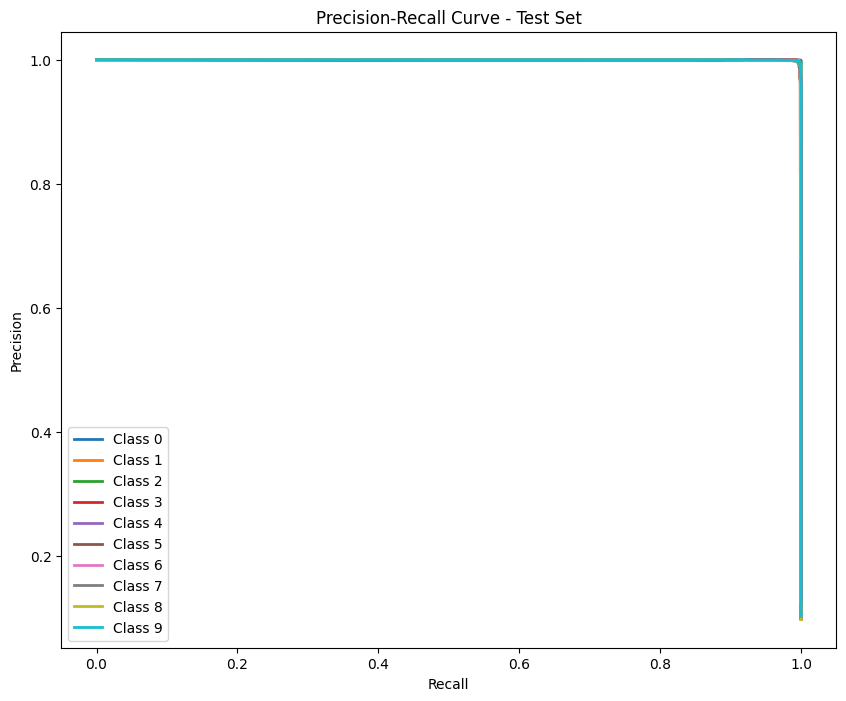

In [16]:
# Assuming model, history, and history_path are already defined
evaluate_and_plot(model, val_images, val_labels, test_images, test_labels, combined_history, '/content/drive/MyDrive/initial_eval_history.pkl')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


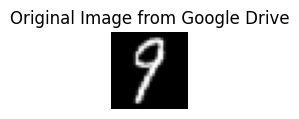

Loaded image shape: (28, 28)
Pixel values range: 0.0 1.0


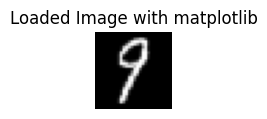

Image loaded successfully.
Resized image shape: (28, 28)
Final image shape for model: (1, 28, 28, 1)
Pixel values range after preprocessing: 0.0 0.003921569


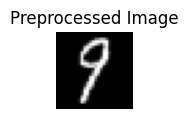

1/1 [==============================] - 1s 835ms/step
Predicted class: 1
1/1 [==============================] - 0s 21ms/step


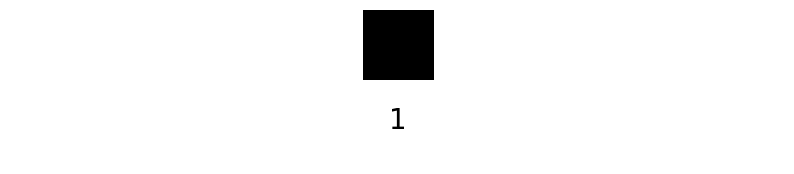

In [17]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from google.colab import drive
import matplotlib.image as mpimg

# Mount Google Drive
drive.mount('/content/drive')

# Define the SEBlock class
class SEBlock(layers.Layer):
    def __init__(self, filters, reduction=16, **kwargs):
        super(SEBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction = reduction
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(filters // reduction, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        self.reshape = layers.Reshape((1, 1, filters))

    def call(self, inputs):
        x = self.global_avg_pool(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.reshape(x)
        return inputs * x

    def get_config(self):
        config = super(SEBlock, self).get_config()
        config.update({
            'filters': self.filters,
            'reduction': self.reduction
        })
        return config

# Load the pre-trained CNN model with custom layer SEBlock
model = load_model('/content/drive/MyDrive/initial_model_c5.h5', custom_objects={'SEBlock': SEBlock})

# Function to display the original image from Google Drive
def display_original_image(image_path):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(1, 1))
    plt.imshow(img, cmap='gray')
    plt.title('Original Image from Google Drive')
    plt.axis('off')
    plt.show()

# Function to load and display the image using matplotlib
def load_and_display_image(image_path):
    image = mpimg.imread(image_path)
    if image is None:
        print("Error loading image with matplotlib.")
        return None

    # Convert to grayscale if it's in RGB format
    if image.ndim == 3:
        image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    print(f"Loaded image shape: {image.shape}")
    print(f"Pixel values range: {np.min(image)} {np.max(image)}")

    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='gray')
    plt.title('Loaded Image with matplotlib')
    plt.axis('off')
    plt.show()

    return image

# Function to preprocess the input image
def preprocess_image(image):
    if image.shape != (28, 28):
        image = cv2.resize(image, (28, 28))
    print(f"Resized image shape: {image.shape}")
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    print(f"Final image shape for model: {image.shape}")

    print("Pixel values range after preprocessing:", np.min(image), np.max(image))

    plt.figure(figsize=(1, 1))
    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()

    return image

# Function to segment multi-digit strings into individual digits
def segment_digits(image):
    if image.ndim == 3:
        image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Binarize the image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to separate digits
    kernel = np.ones((3, 3), np.uint8)
    binary_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Ensure the image is in the correct format
    binary_image = binary_image.astype(np.uint8)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    digit_images = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 5 and h > 5:  # Filter out small contours that are not digits
            digit_image = binary_image[y:y+h, x:x+w]
            digit_image = cv2.resize(digit_image, (28, 28))
            digit_image = digit_image.astype('float32') / 255.0
            digit_image = np.expand_dims(digit_image, axis=-1)
            digit_images.append((x, digit_image))

    # Sort the digit images by their x-coordinate (left to right)
    digit_images = sorted(digit_images, key=lambda img: img[0])
    digit_images = [img[1] for img in digit_images]

    return digit_images

# Function to predict digits from segmented images
def predict_digits(digit_images, model):
    predictions = []
    for digit_image in digit_images:
        digit_image = np.expand_dims(digit_image, axis=0)
        prediction = model.predict(digit_image)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predictions.append(predicted_class)
    return predictions

# Function to display the results
def display_results(digit_images, predictions):
    plt.figure(figsize=(10, 2))
    for idx, digit_image in enumerate(digit_images):
        plt.subplot(2, len(digit_images), idx + 1)
        plt.imshow(digit_image.reshape(28, 28), cmap='gray')
        plt.axis('off')

    for idx, prediction in enumerate(predictions):
        plt.subplot(2, len(digit_images), len(digit_images) + idx + 1)
        plt.text(0.5, 0.5, str(prediction), fontsize=20, ha='center')
        plt.axis('off')
    plt.show()

# Pipeline function for end-to-end process
def process_handwritten_address(image_path, model):
    image = mpimg.imread(image_path)
    digit_images = segment_digits(image)
    if not digit_images:
        print("No digits segmented.")
        return
    predictions = predict_digits(digit_images, model)
    display_results(digit_images, predictions)

# Example usage
image_path = '/content/drive/MyDrive/FinalProject/images/emnist_valid_images/image_1_label_9.png'

# Display the original image from Google Drive
display_original_image(image_path)

# Load and display the image using matplotlib
loaded_image = load_and_display_image(image_path)

if loaded_image is not None:
    print("Image loaded successfully.")
    preprocessed_image = preprocess_image(loaded_image)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Predicted class:", predicted_class)

    process_handwritten_address(image_path, model)
else:
    print("Failed to load image.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 20ms/step


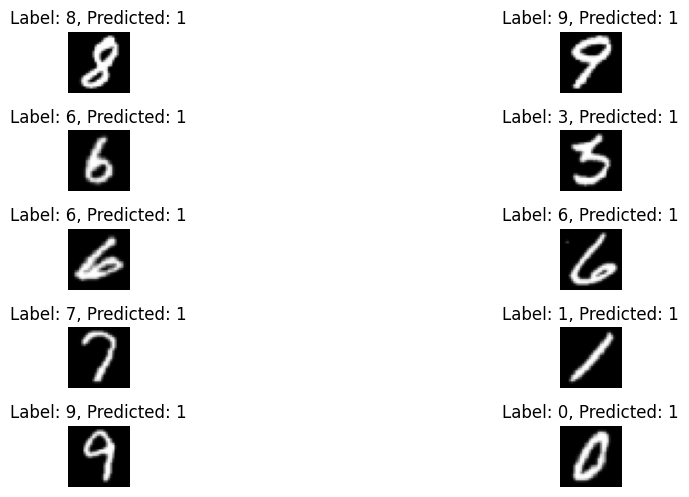

Verification completed.


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from google.colab import drive
import matplotlib.image as mpimg
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Define the SEBlock class
class SEBlock(layers.Layer):
    def __init__(self, filters, reduction=16, **kwargs):
        super(SEBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction = reduction
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.dense1 = layers.Dense(filters // reduction, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        self.reshape = layers.Reshape((1, 1, filters))

    def call(self, inputs):
        x = self.global_avg_pool(inputs)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.reshape(x)
        return inputs * x

    def get_config(self):
        config = super(SEBlock, self).get_config()
        config.update({
            'filters': self.filters,
            'reduction': self.reduction
        })
        return config

# Load the pre-trained CNN model with custom layer SEBlock
model = load_model('/content/drive/MyDrive/initial_model_c5.h5', custom_objects={'SEBlock': SEBlock})

# Function to preprocess the input image
def preprocess_image(image):
    if image.shape != (28, 28):
        image = cv2.resize(image, (28, 28))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

# Load a few samples from the training data to verify
corrected_train_images_path = '/content/drive/MyDrive/FinalProject/corrected_datasets/emnist_corrected_train_images.npy'
corrected_train_labels_path = '/content/drive/MyDrive/FinalProject/corrected_datasets/emnist_corrected_train_labels.npy'

X_train = np.load(corrected_train_images_path)
y_train = np.load(corrected_train_labels_path)

# Select a few samples to test
num_samples_to_test = 10
samples = X_train[:num_samples_to_test]
labels = y_train[:num_samples_to_test]

# Predict and display results
plt.figure(figsize=(10, 10))
for i in range(num_samples_to_test):
    image = samples[i]
    label = labels[i]
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]

    plt.subplot(num_samples_to_test, 2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}, Predicted: {predicted_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Verification completed.")
